In [91]:
from solution import *
from methods import *
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.signal import argrelextrema

In [27]:
# Return the fourier spectrum of the given vector
def fft_spec(vec, Fs):
    F = np.abs(np.fft.fft(vec))
    N = vec.shape[0]
    fs = np.arange(0,N,1)*(Fs/N)
    return (fs, F)

def fft_dom(vec, Fs):
    F = np.abs(np.fft.fft(vec))
    N = vec.shape[0]
    fs = np.arange(0,N,1)*(Fs/N)
    imax = np.argmax(F[0:int(N/2)])
    return fs[imax]


<IPython.core.display.Javascript object>


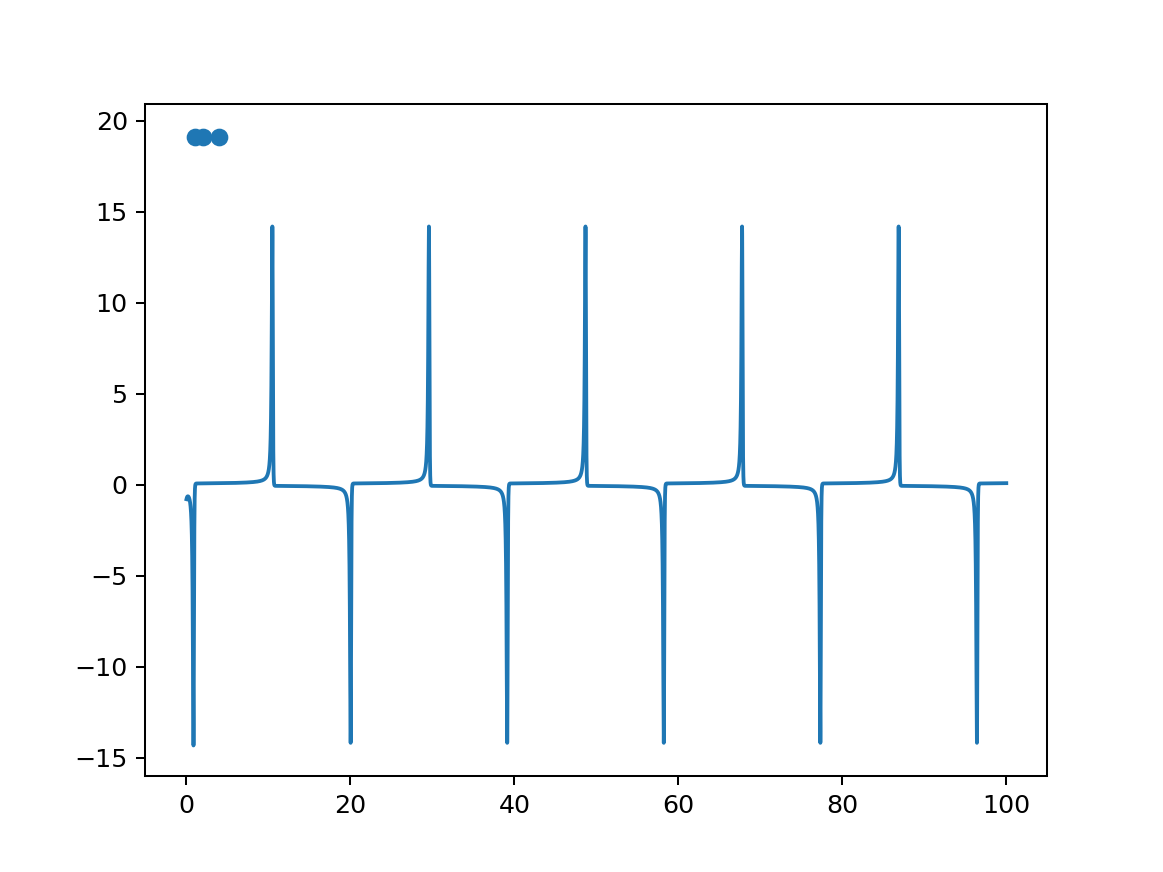

0

In [125]:
mu = 10
def vp_eq(state):
    x = state[0]
    y = state[1]
    return np.array([y, mu*(1-x**2)*y - x])

V1 = np.array([1.2, -0.8])
T = 100
dt = 0.0001
vp0 = euler(vp_eq, V1, 0, T, dt)
%matplotlib notebook
#phasePortrait(vp0,0,1)

plotSolution(vp0,1)

<IPython.core.display.Javascript object>


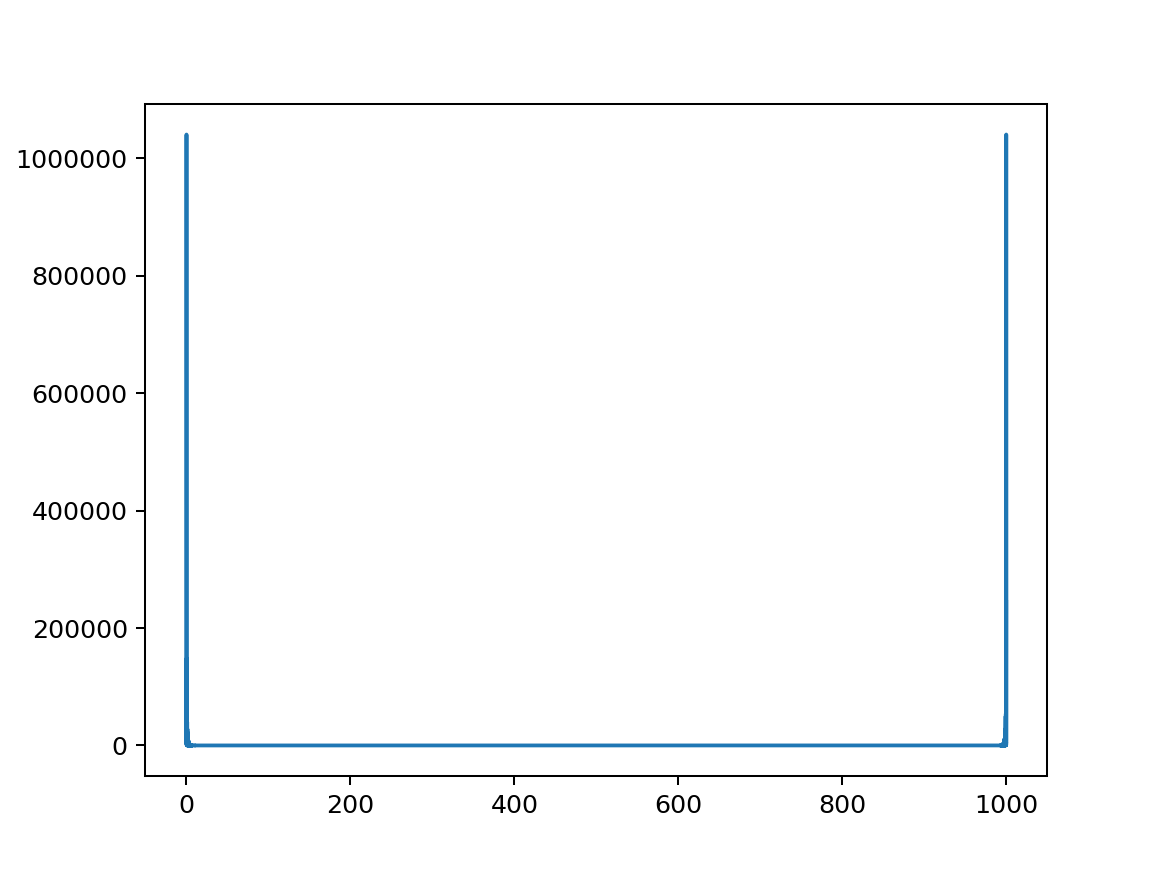

In [49]:
%matplotlib notebook
fs,F = fft_spec(vp0.trajectory[:,0],1/dt)
plt.plot(fs,F)

## Estimation of local truncation error

<IPython.core.display.Javascript object>


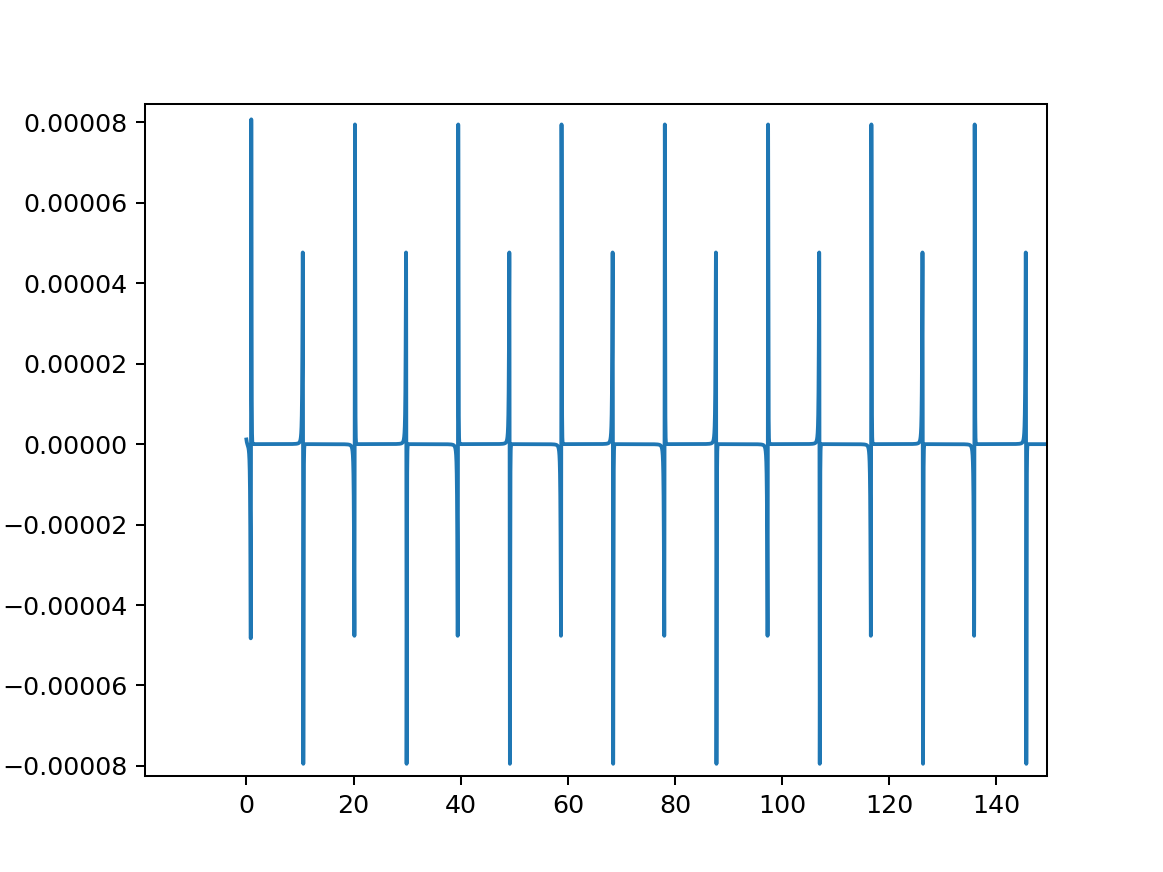

In [52]:
def LTE(vec, h):
    return 0.5 * h * np.diff(vec)

lte = LTE(vp0.trajectory[:,1],0.001)

%matplotlib notebook
plt.plot(vp0.time[0:-1], lte)

In [53]:
f_err = fft_dom(lte, 1/dt)
1/f_err

0.49431537320810676

## Frequency (of solution and LTE) dependence on timestep size

In [55]:
dts = np.arange(0.001,0.01,0.001)
Ts = np.zeros((dts.shape[0],))
T_errs = np.zeros((dts.shape[0],))

for i in range(Ts.shape[0]):
    print('%d ' %i)
    dt = dts[i]
    sol = euler(vp_eq, V1, 0, 500, dt)
    f = fft_dom(sol.trajectory[:,0], 1/dt)
    lte = LTE(sol.trajectory[:,1],dt)
    T_errs[i] = 1/fft_dom(lte,1/dt)
    Ts[i] = 1/f
    
print('Done')

0 
1 
2 
3 
4 
5 
6 
7 
8 
Done


<IPython.core.display.Javascript object>


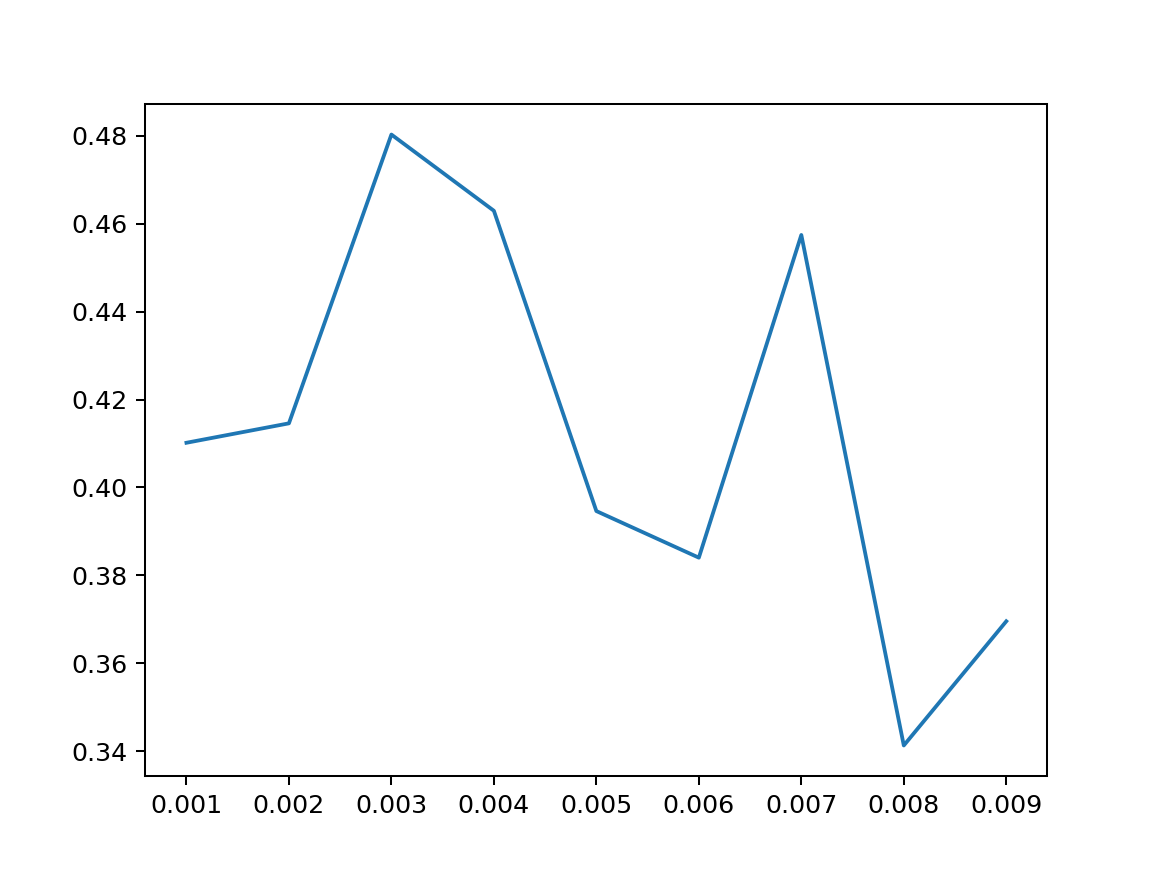

In [56]:
%matplotlib notebook
plt.plot(dts,T_errs)

<IPython.core.display.Javascript object>


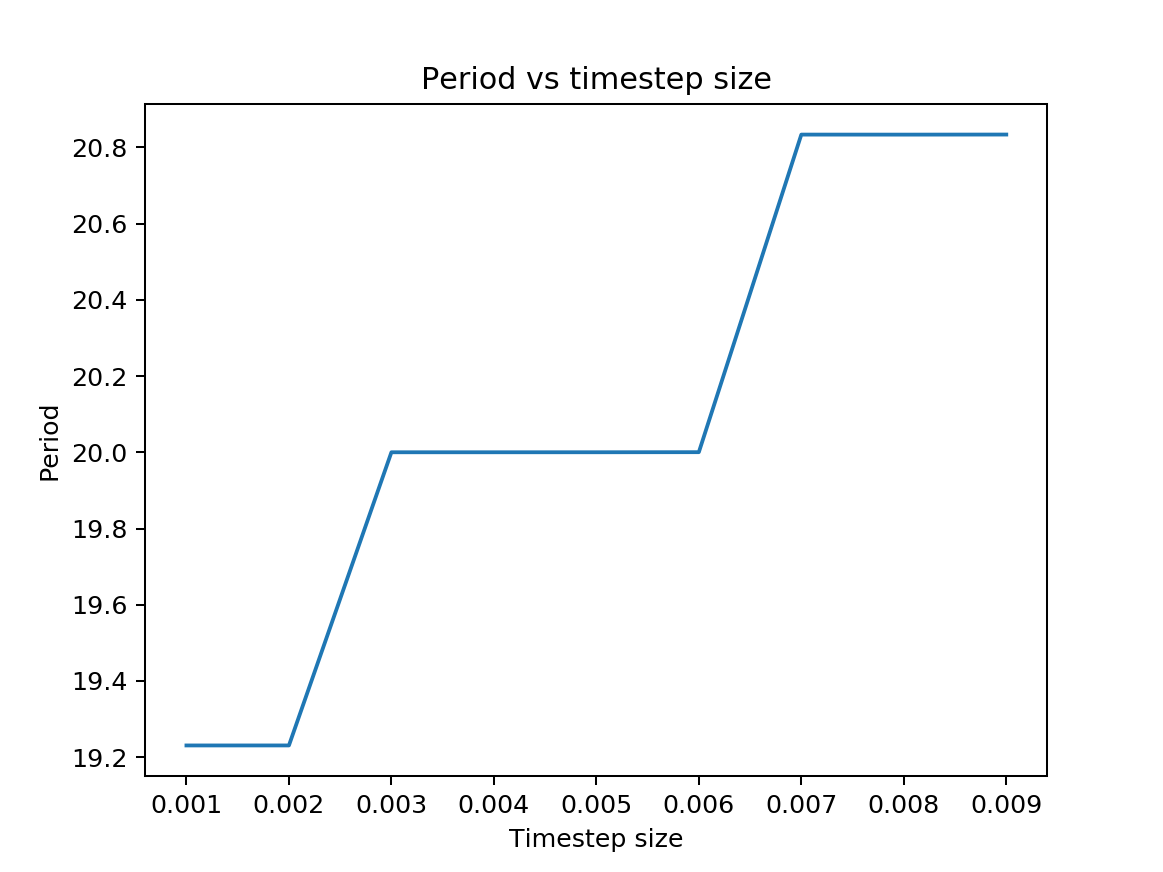

Text(0.5, 1.0, 'Period vs timestep size')

In [57]:
%matplotlib notebook
plt.plot(dts,Ts)
plt.xlabel('Timestep size')
plt.ylabel('Period')
plt.title('Period vs timestep size')

## Try with RK4

In [136]:
dt = 0.0001
v = rk4(vp_eq,V1,0,500,dt)
u = rk4(vp_eq,V1,0,500,dt/2)

<IPython.core.display.Javascript object>


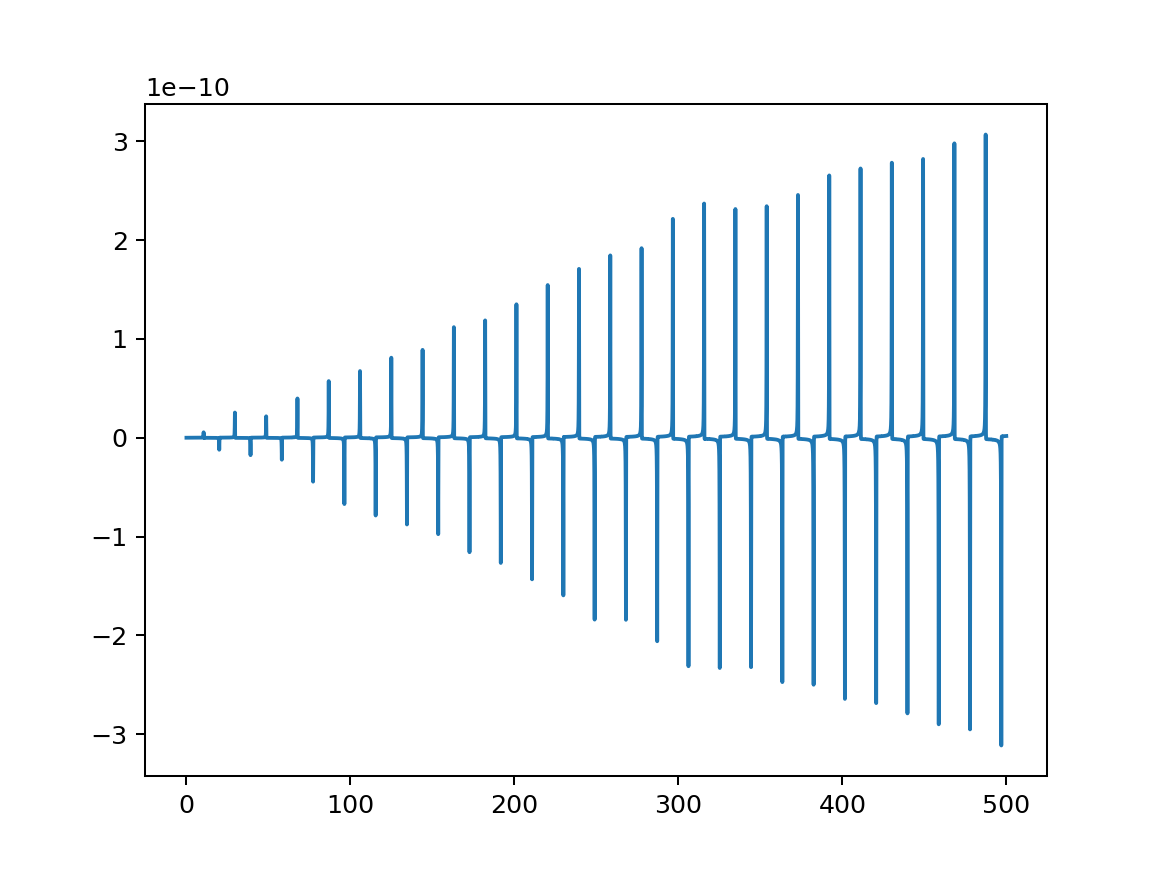

In [137]:
vt = v.trajectory
ut = u.trajectory
ut = ut[0::2,:]

%matplotlib notebook
plt.plot(v.time, ut[:,0]-vt[:,0])


In [100]:
f = fft_dom(ut[:,0]-vt[:,0], 1/dt)
1/f

19.084160305343513

<IPython.core.display.Javascript object>


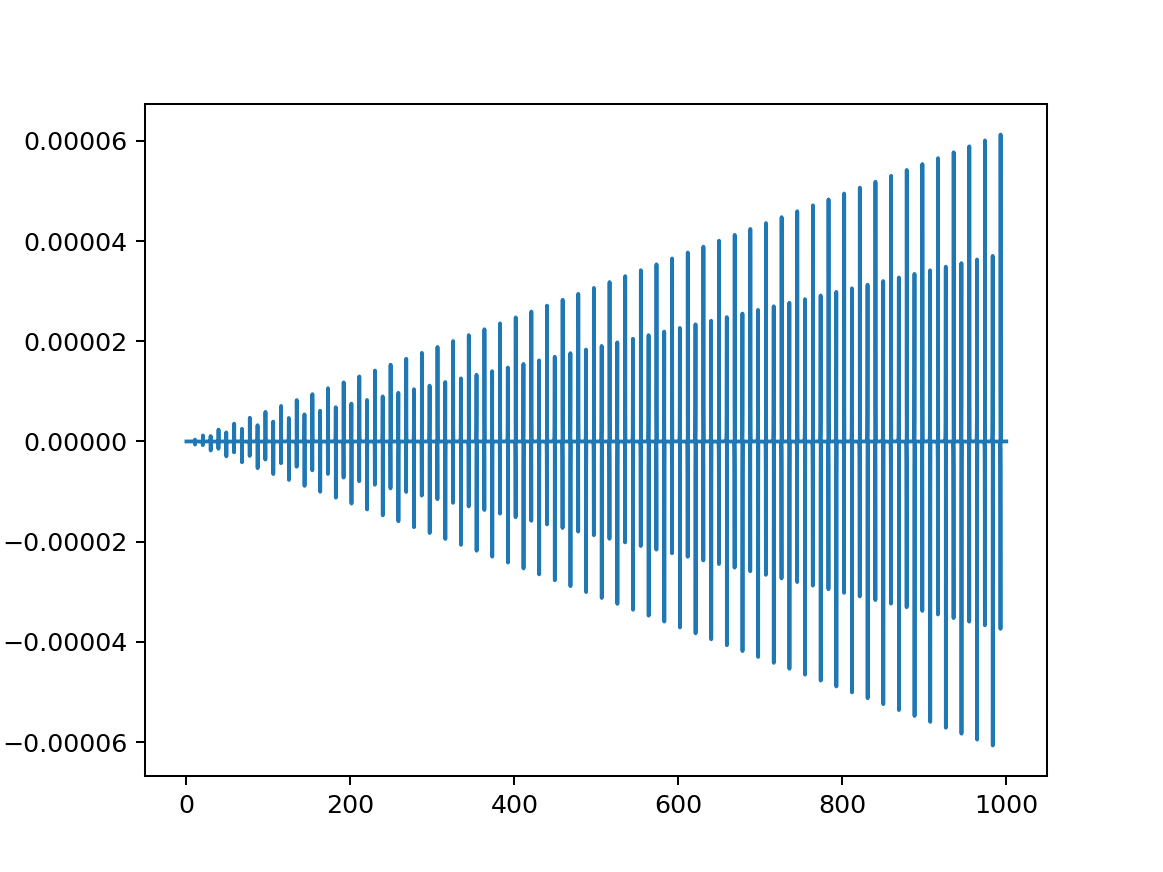

In [76]:
%matplotlib notebook
plt.plot(v.time, ut[:,1]-vt[:,1])

In [62]:
dts1 = np.arange(0.001,0.05,0.001)

Ts_rk4 = np.zeros((dts1.shape[0],))
for i in range(dts1.shape[0]):
    print('%d ' %i)
    dt = dts1[i]
    sol = rk4(vp_eq, V1, 0, 100, dt)
    f = fft_dom(sol.trajectory[:,0], 1/dt)
    Ts_rk4[i] = 1/f
    
print('Done')

0 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
Done


<IPython.core.display.Javascript object>


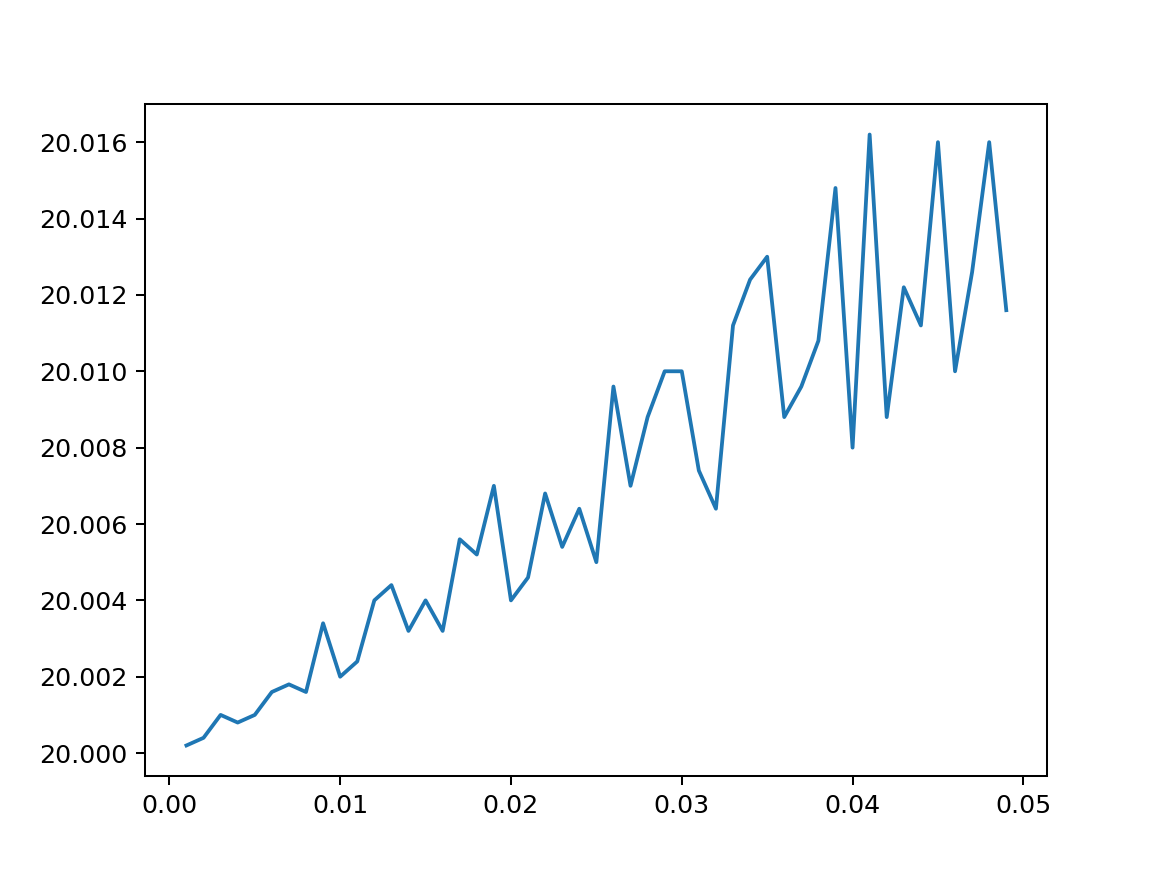

20.0002

In [79]:
%matplotlib notebook
plt.plot(dts1, Ts_rk4)
Ts_rk4[0]

In [50]:
dt

0.001

In [109]:
dt = 0.001
v_euler = euler(vp_eq,V1,0,500,dt)
v_rk4 = rk4(vp_eq,V1,0,500,dt)

<IPython.core.display.Javascript object>


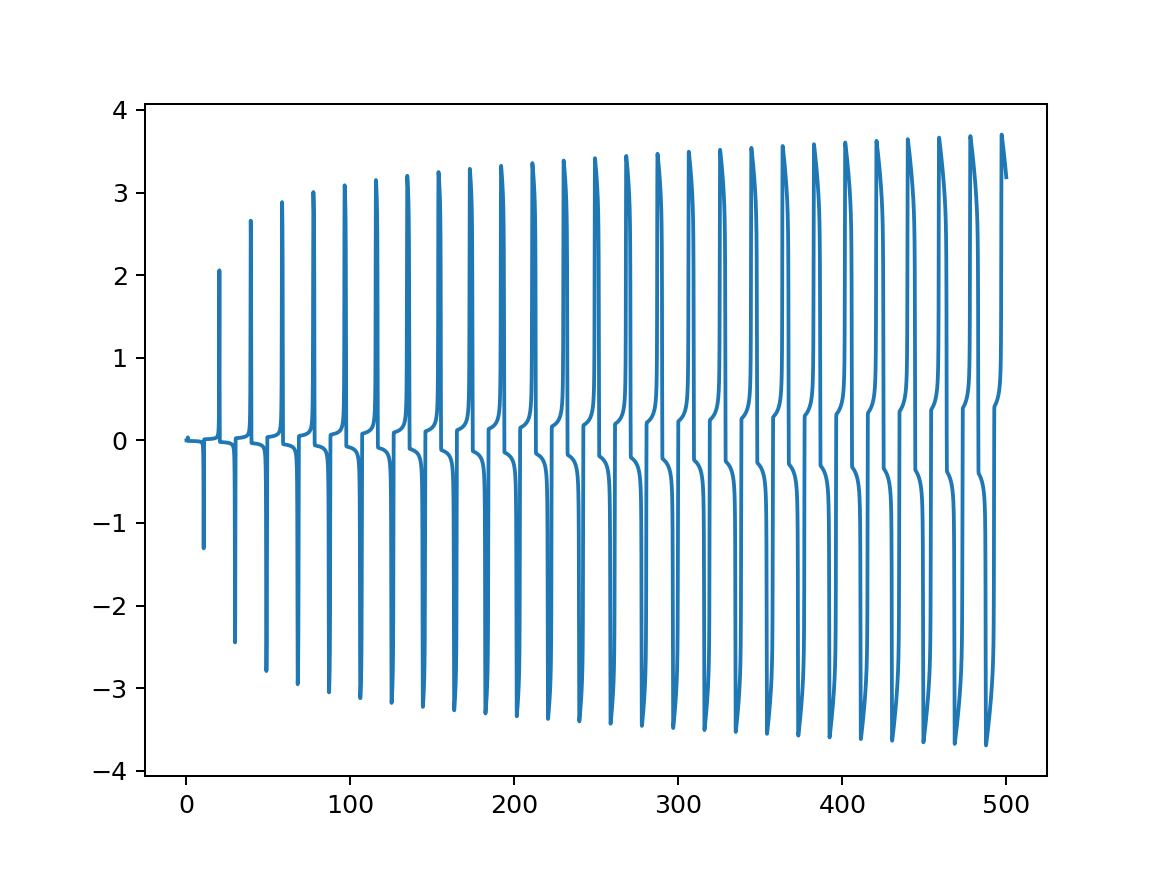

In [110]:
%matplotlib notebook
t_euler = v_euler.trajectory
t_rk4 = v_rk4.trajectory
#diffSolution(v_euler,v_rk4)
plt.plot(v_rk4.time, t_euler[:,0]-t_rk4[:,0])

## Inserting sinusoidal forcing term

In [120]:
mu = 3
def vp_force(amp, state):
    t = state[0]
    x = state[1]
    v = state[2]
    return np.array([1, v, mu*(1-x**2)*v - x + amp*np.cos(t)])

def vp_force2(state):
    t = state[0]
    x = state[1]
    v = state[2]
    return np.array([1, v, mu*(1-x**2)*v - x + 0.3*np.cos(t)])

init = np.array([0, 1, 1])
f1 = rk4(partial(vp_force,0.1), init, 0, 1000, 0.01)
#f2 = rk4(vp_force2, init, 0, 10000, 0.01)

<IPython.core.display.Javascript object>


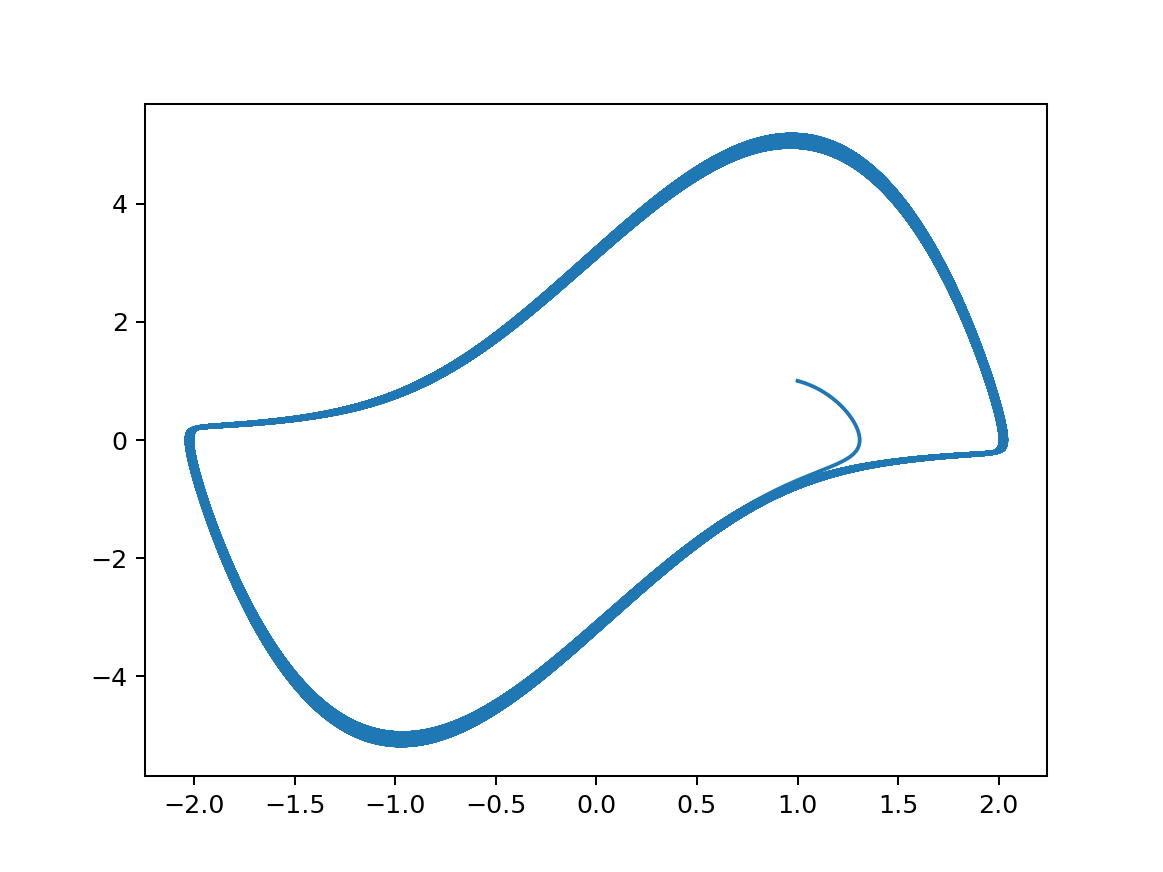

0

In [121]:
%matplotlib notebook
phasePortrait(f1, 1,2)
#phasePortrait(f2,1,2)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


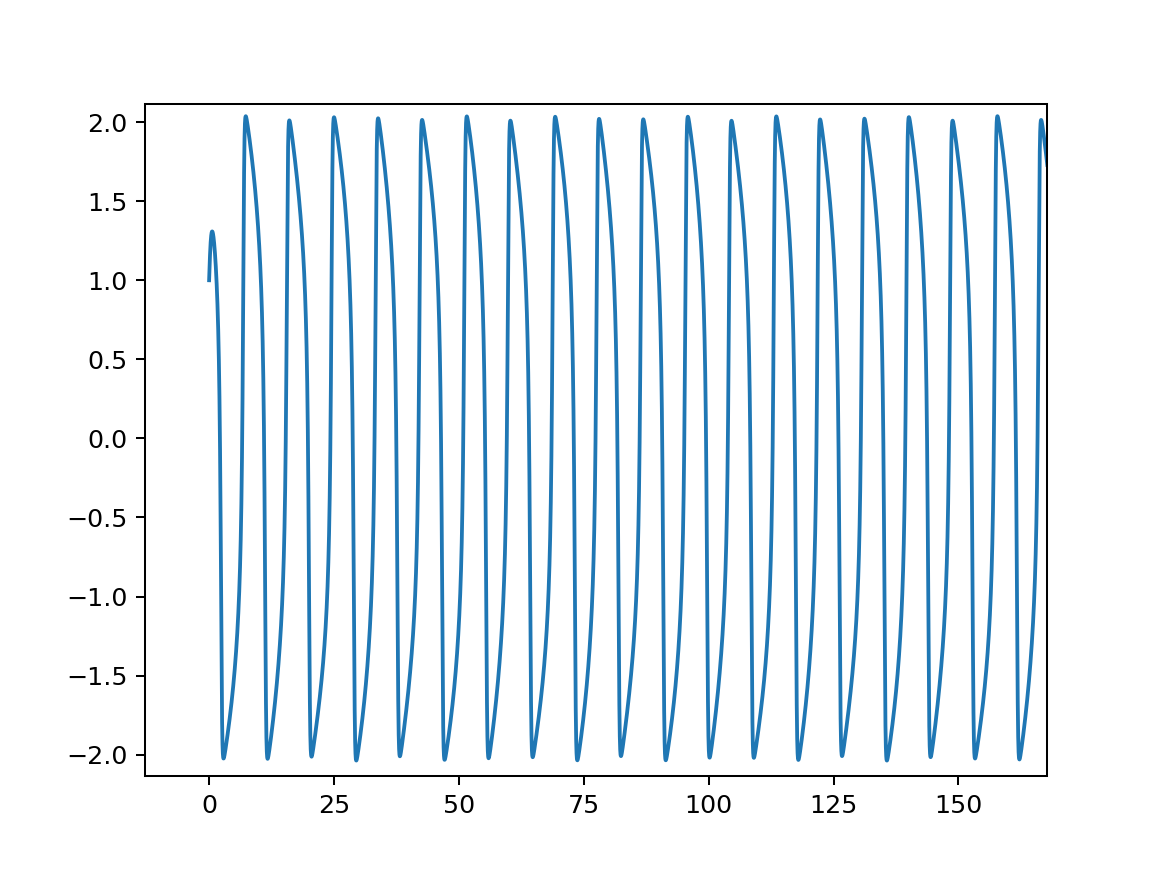

0

In [123]:
%matplotlib
plotSolution(f1, 1)

In [174]:
diffSolution(f1,f2)

ValueError: operands could not be broadcast together with shapes (100001,3) (1000001,3) 

In [29]:
peak = fft_dom(f1.trajectory[:,1], 1/0.01)

In [30]:
peak

0.112999887000113

In [31]:
peak2 = fft_dom(f2.trajectory[:,1],1/0.01)

In [32]:
peak2

0.1132998867001133

In [34]:
peak3 = fft_dom(f2.trajectory[:,1],1/0.01)

In [35]:
peak3

0.1137998862001138

In [68]:

amps = np.arange(0.01,2,0.01)
freqs = np.zeros((amps.shape[0],))
init = np.array([0, 1, 1])
dt = 0.01

for i in range(amps.shape[0]):
    func = partial(vp_force, amps[i])
    print(amps[i])
    sol = rk4(func, init, 0, 1000, dt)
    freqs[i] = fft_dom(sol.trajectory[:,1],1/dt)
    

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.1600000000000001
1.17
1.1

<IPython.core.display.Javascript object>


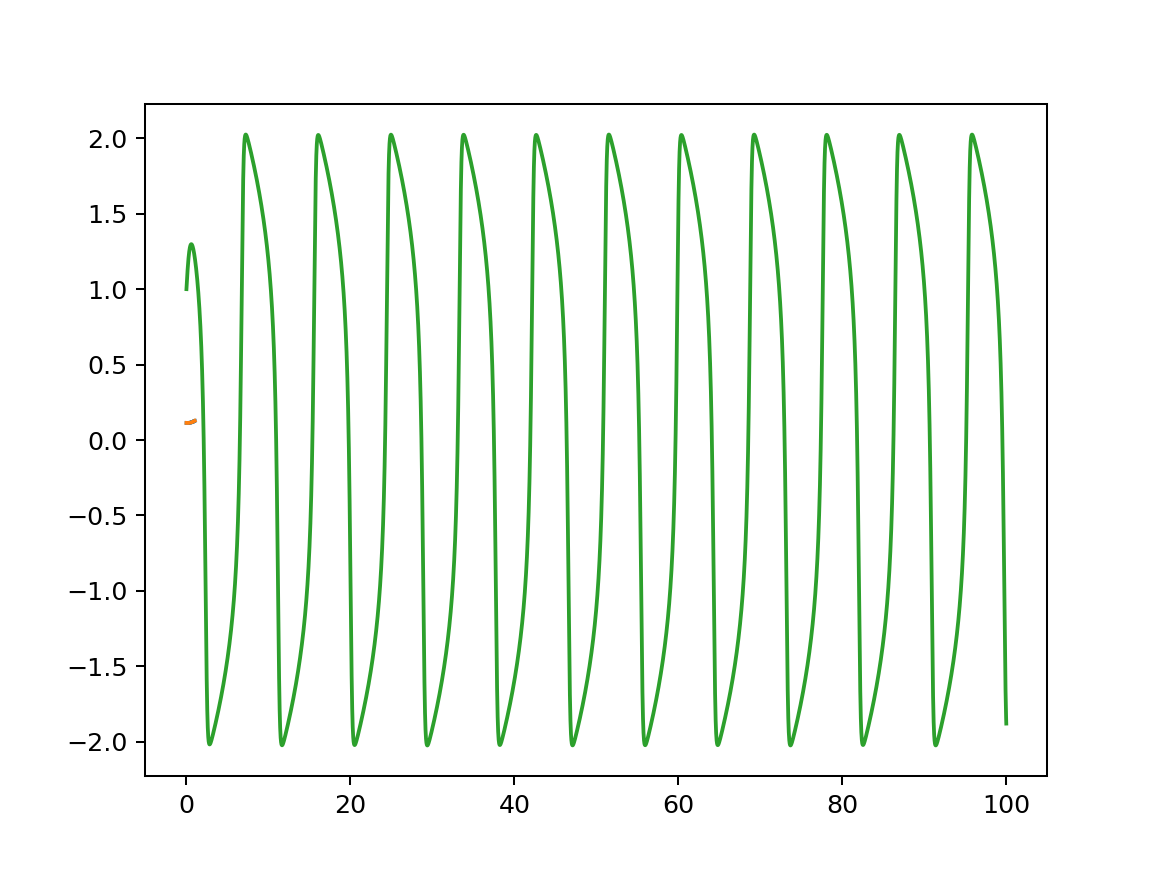

In [90]:
%matplotlib notebook
plt.plot(amps[:100], freqs[:100])
z = np.polyfit(amps[:100], freqs[:100],2)
p = np.poly1d(z)
plt.plot(amps[:100],p(amps[:100]))
#plt.plot(amps, 0.01*amps**2 + 0.115)

In [43]:
freqs[3]

0.10998900109989002

In [57]:
np.arange(0.01,0.1,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

## Period vs. forcing amplitude

In [118]:

amps = np.arange(0.001,0.1,0.001)
Ts = np.zeros((amps.shape[0],))
init = np.array([0, 1, 1])
dt = 0.001

for i in range(amps.shape[0]):
    func = partial(vp_force, amps[i])
    # print(amps[i])
    sol = rk4(func, init, 0, 100, dt)
    
    traj = sol.trajectory[:,1]
    mins = argrelextrema(traj, np.less)[0]
    Ts[i] = sol.time[mins[3]] - sol.time[mins[2]]

<IPython.core.display.Javascript object>


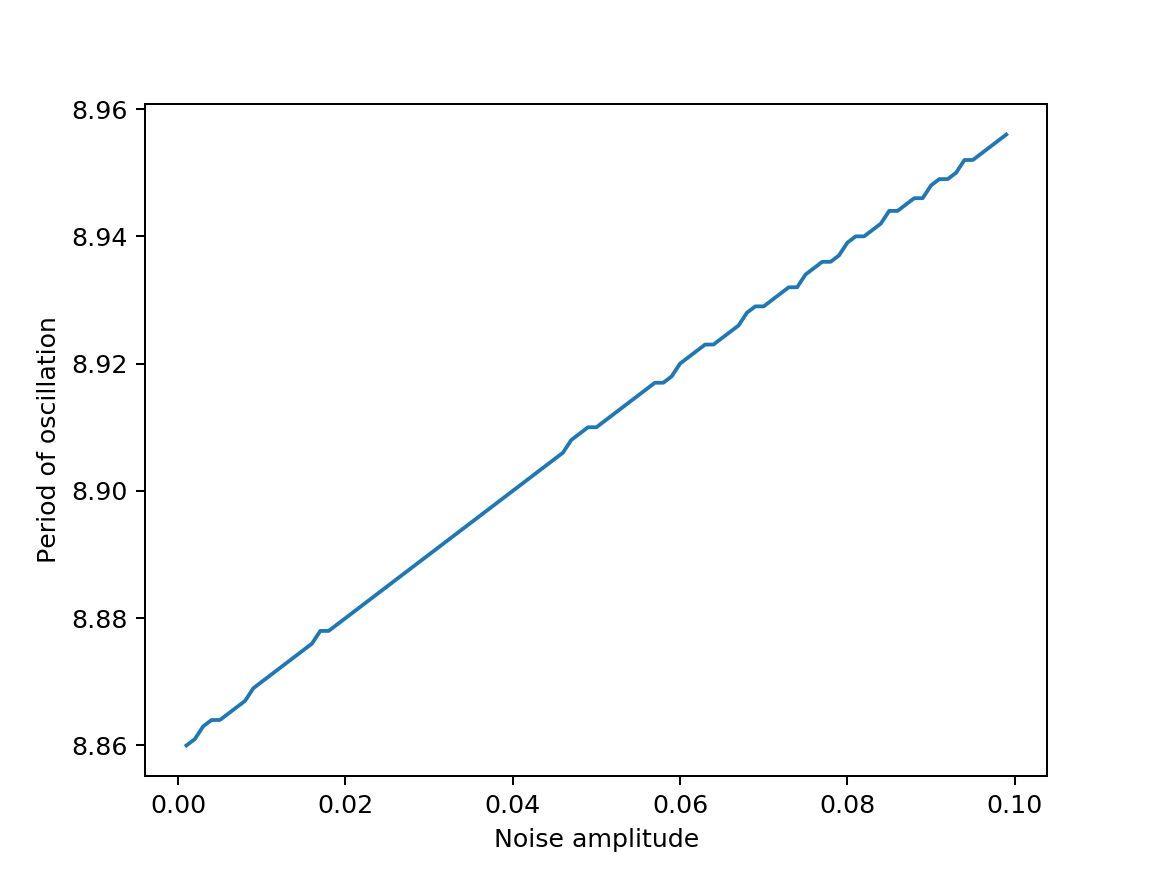

Text(0, 0.5, 'Period of oscillation')

In [122]:
%matplotlib notebook
plt.plot(amps,Ts)
plt.xlabel('Noise amplitude')
plt.ylabel('Period of oscillation')

In [93]:
sol = rk4(func, init, 0, 100, dt)

In [94]:
mins = argrelextrema(sol.trajectory[:,1], np.less)

In [96]:
mins

(array([ 283, 1166, 2051, 2938, 3823, 4710, 5595, 6481, 7368, 8252, 9139]),)

<IPython.core.display.Javascript object>


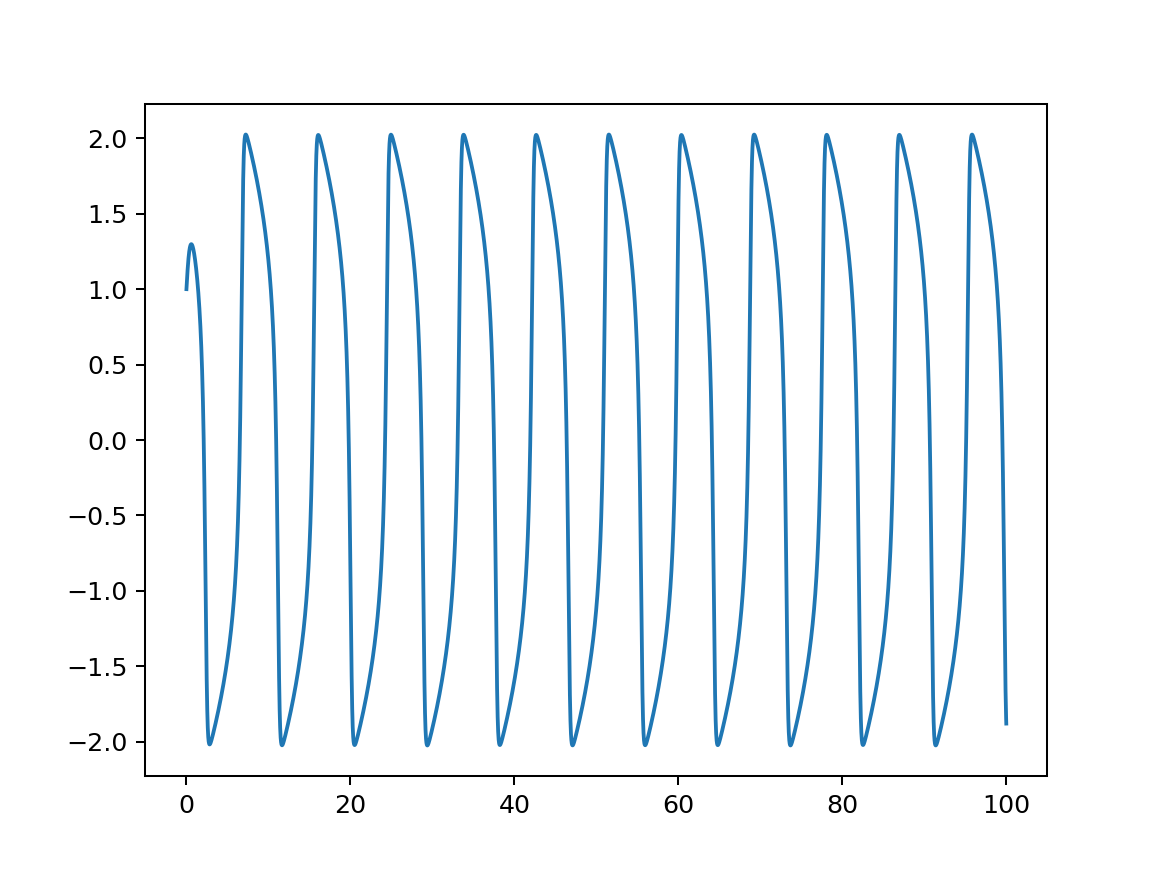

0

In [98]:
%matplotlib notebook
plotSolution(sol, 1)

## Period vs Order of scheme (Taylor series terms)

In [155]:
init = np.array([1,1])
dt = 0.02
sol0 = euler(vp_eq, init, 0, 100, dt)
sol1 = rk2(vp_eq, init, 0, 100, dt)
sol2 = rk4(vp_eq, init, 0, 100, dt)
sol3 = adams_bashforth_moulton4(vp_eq, init, 0, 100, dt)
sol4 = adams_bashforth_moulton5(vp_eq, init, 0, 100, dt)

def findPeriod(sol):
    traj = sol.trajectory[:,1]
    mins = argrelextrema(traj, np.less)[0]
    return sol.time[mins[2]] - sol.time[mins[1]]

periods = [findPeriod(s) for s in [sol1, sol2, sol3, sol4]]

In [148]:
periods

[24.16, 18.98, 19.080000000000002, 19.080000000000002]

<IPython.core.display.Javascript object>


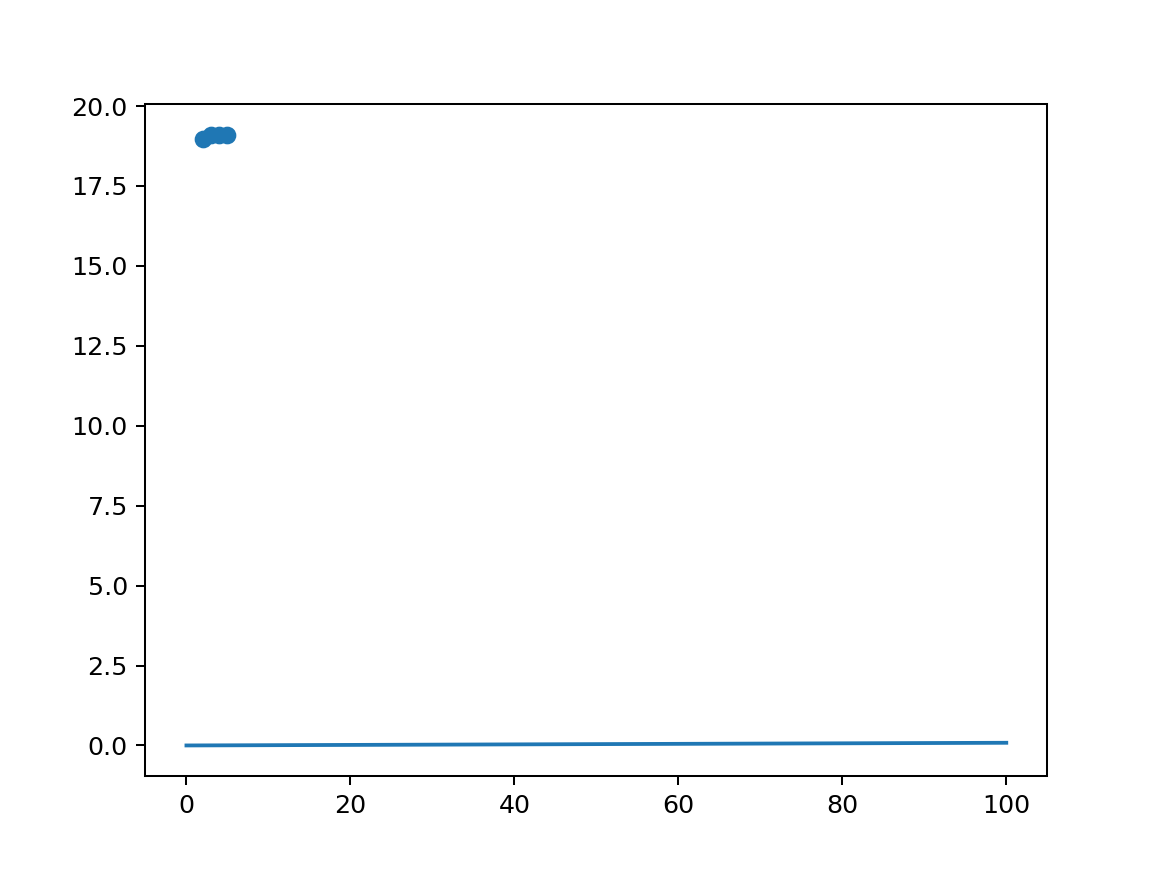

In [157]:
%matplotlib notebook
plt.scatter(np.array([2,3,4,5]), periods)

In [175]:
k = 1
def harm(state):
    u = state[0]
    v = state[1]
    return np.array([v, -k*u])

harm0 = np.array([0.5, 0])
dt = 0.1
h0 = rk2(harm, harm0, 0, 1000, dt)
h1 = rk4(harm, harm0, 0, 1000, dt)


In [169]:
periods = [findPeriod(s) for s in [h0,h1]]

In [170]:
periods

[6.300000000000001, 6.200000000000001]

<IPython.core.display.Javascript object>


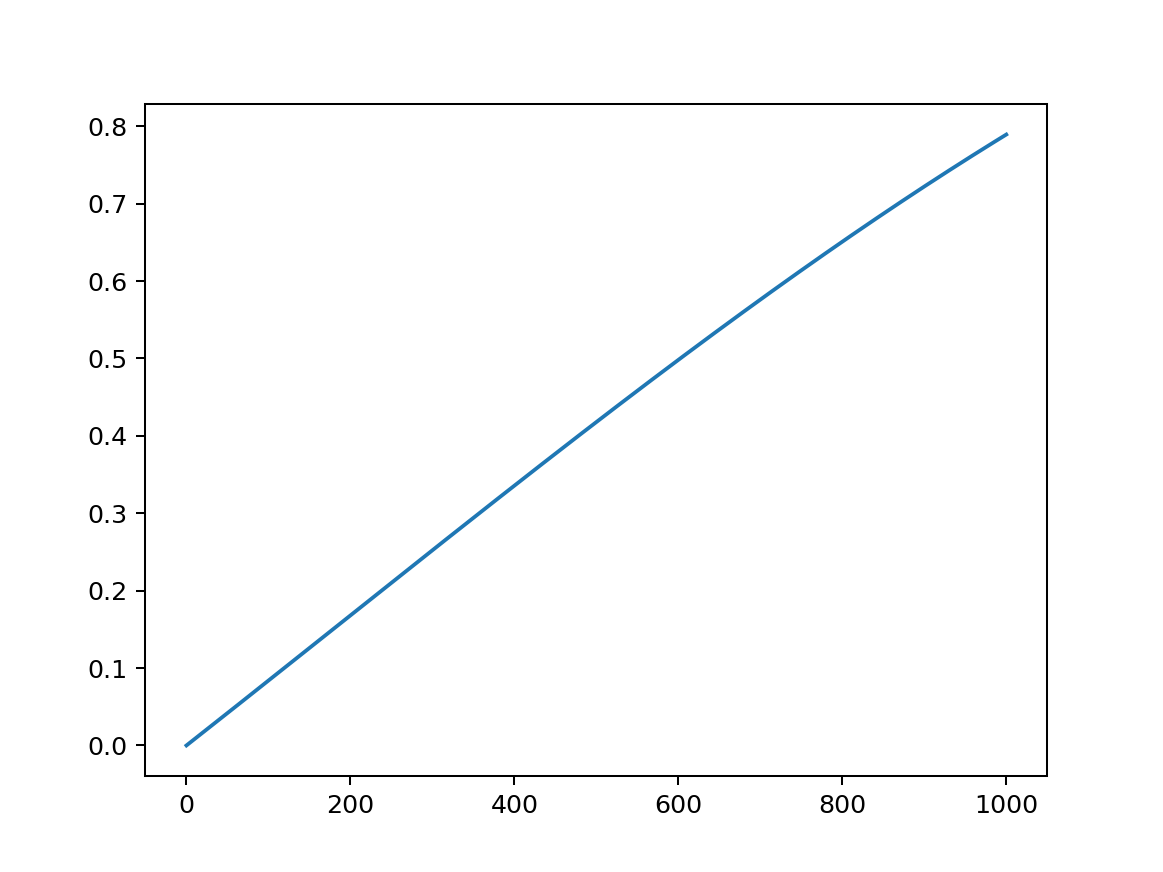

array([0.00000000e+00, 8.33593709e-05, 1.66719783e-04, ...,
       7.89071931e-01, 7.89136851e-01, 7.89201766e-01])

In [176]:
%matplotlib notebook
diffSolution(h0,h1)

<IPython.core.display.Javascript object>


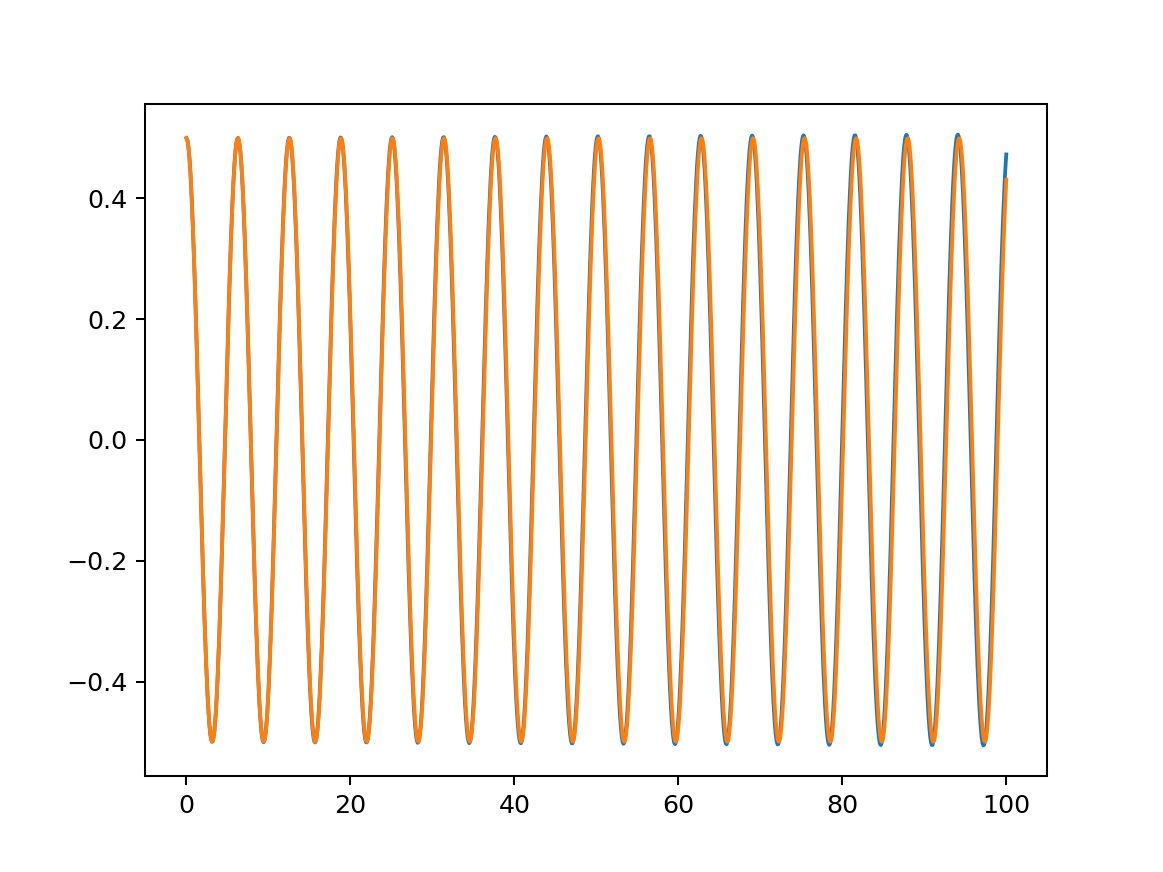

0

In [173]:
%matplotlib notebook
plotSolution(h0,0)
plotSolution(h1,0)